<a href="https://colab.research.google.com/github/anagha102/Predict-if-a-note-is-genuine-or-not/blob/main/Predict_if_a_note_is_genuine_or_not.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**
Banknotes are one of the most important assets of a country. Some miscreants introduce fake notes which bear a resemblance to original note to create discrepancies of the money in the financial market. It is difficult for humans to tell true and fake banknotes apart especially because they have a lot of similar features. 
Therefore in this notebook, we'll be performing Binary Classification to predict if a note is genuine or not.

There are 2 classes:

Note is genuine (class=1)
Note is not genuine (class=0)

# **Agenda:**
1. About the Dataset
2. Objective
3. Loading Libraries
4. Loading Data
5. Separating Input and target Variable
6. Split The Data into Train and Test Set
7. Train the model :

    A. Define the model.
    B. Compile the model.
    C. Fit the model.
    D. Evaluate the model
    E. Hyperparameter Tunning (if required)
8. Prediction

## **About the Dataset:**
This dataset contains 1096 observations and 5 attributes. Target variable refers to attribute 'Class'.

VWTI: Variance of Wavelet Transformed Image

SWTI: Skewness of Wavelet Transformed Image

CWTI: Curtosis of Wavelet Transformed Image

EI: Entropy of Image

Class: Class (1: genuine, 0: forged) ]

## **Objective:**
To predict if note is genuine or not. 

## **Loading Libraries**
In data science, numpy, pandas and matplotlib are most commonly used libraries We chose alias names for our libraries for the sake of our convenience (numpy --> np and pandas --> pd, matplotlib.pyplot as plt).

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## **Loading Data**

Pandas module is used for reading files. Since we have our data in '.csv' format, we will use 'read_csv()' function for loading the data.

In [30]:
bank_note_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/bank_note_data/training_set_label.csv" )

In [31]:
bank_note_data.head()

,VWTI,SWTI,CWTI,EI,Class
0,2.2634,-4.4862,3.6558,-0.612510,0
1,3.2718,1.7837,2.1161,0.613340,0
2,-3.9411,-12.8792,13.0597,-3.312500,1
3,0.5195,-3.2633,3.0895,-0.984900,0
4,2.5698,-4.4076,5.9856,0.078002,0


## **Separating Input and Target Variable:**
Target Variable/ Independent Variable(y): Our objective is to detect the note is genuine or not. Thus, our target variable will be the column that indicates whether note is genuine or not. We'll store that column in a variable y.

Input Variables/ Dependent Variables(X): The remaining columns, without the Target variable will be stored in variable X.

In [32]:
X = bank_note_data.drop('Class', axis=1) #Input variables
y = bank_note_data['Class']  # Target variable


## **Splitting into Train and Test Sets:**
Split the given data (both input and output data) into train set which will be used to train the model, and test set which will be used to check how accurately the model is predicting outcomes.

This is achieved using train_test_split function provided in the model_selection class of sklearn module.

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Train the Model:**
Now that we have our data fully processed and split into training and testing datasets, we can begin building a neural network to solve this classification problem.

In [34]:
# Imports
import tensorflow as tf  # Importing the TensorFlow Library
from tensorflow import keras  # Import Keras from TensorFlow

from tensorflow.keras import Sequential 
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense

### **A. Defining model:**
Models can be defined either with the Sequential API or the Functional API. Here we will define the model with Sequential API.

In [35]:
# Building the model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))   
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  

The above code creates a Neural Network that has 4 layers.

The last node uses the sigmoid activation function that will squeeze all the values between 0 and 1. While other layers use ReLU.

One output unit is used since for each record values in X, a probability will be predicted. If it is high, then the note is genuine. If it is less, then the note is not genuine.

### **B. Compile the Model:**

In [36]:
# Compiling the model
from tensorflow.keras.optimizers import RMSprop
optimizer = RMSprop(0.001)  # Here, we have set our learning rate as 0.001
model.compile(loss='binary_crossentropy', optimizer= optimizer , metrics=['accuracy'])

We’re using RMSprop as our optimizer here. RMSprop is an optimizer that’s reliable and fast.

In [37]:

# printing the summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                160       
_________________________________________________________________
dense_5 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
Total params: 833
Trainable params: 833
Non-trainable params: 0
_________________________________________________________________


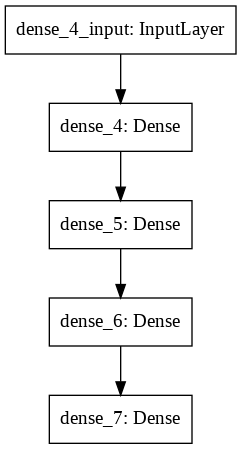

In [38]:
# plotting the model
from tensorflow.keras.utils import plot_model
plot_model(model)

### **C. Fit the Model**

In [39]:
history = model.fit(X_train, y_train,validation_split=0.2,epochs=100, verbose=1)

Epoch 1/100
22/22 [==============================] - 0s 9ms/step - loss: 0.4551 - accuracy: 0.8286 - val_loss: 0.3379 - val_accuracy: 0.8920
Epoch 2/100
22/22 [==============================] - 0s 4ms/step - loss: 0.2983 - accuracy: 0.9286 - val_loss: 0.2232 - val_accuracy: 0.9659
Epoch 3/100
22/22 [==============================] - 0s 4ms/step - loss: 0.2056 - accuracy: 0.9829 - val_loss: 0.1530 - val_accuracy: 0.9773
Epoch 4/100
22/22 [==============================] - 0s 4ms/step - loss: 0.1437 - accuracy: 0.9886 - val_loss: 0.1043 - val_accuracy: 0.9716
Epoch 5/100
22/22 [==============================] - 0s 4ms/step - loss: 0.0999 - accuracy: 0.9943 - val_loss: 0.0735 - val_accuracy: 0.9830
Epoch 6/100
22/22 [==============================] - 0s 4ms/step - loss: 0.0698 - accuracy: 0.9971 - val_loss: 0.0507 - val_accuracy: 0.9886
Epoch 7/100
22/22 [==============================] - 0s 4ms/step - loss: 0.0463 - accuracy: 0.9986 - val_loss: 0.0337 - val_accuracy: 1.0000
Epoch 8/100
2

### **D. Model Evaluation:**
The below code passes the X_test and y_test to the trained model and gives out the probability.

In [40]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 1.2503e-08 - accuracy: 1.0000


[1.2503068802516282e-08, 1.0]

**Model Accuracy**

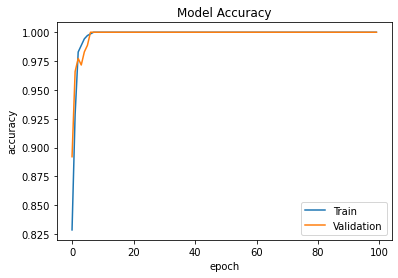

In [41]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

**Model Loss**

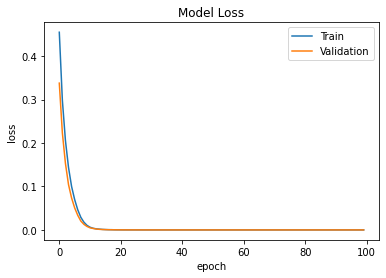

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

## **Prediction**
Making a prediction is the final step.

It requires new data for which a prediction is required.

In [43]:
new_test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/bank_note_data/testing_set_label.csv')

In [44]:
new_test_data.head()

,VWTI,SWTI,CWTI,EI
0,-0.40804,0.54214,-0.52725,0.65860
1,-3.71810,-8.50890,12.36300,-0.95518
2,5.50400,10.36710,-4.41300,-4.02110
3,1.68490,8.74890,-1.26410,-1.38580
4,4.74320,2.10860,0.13680,1.65430


In [45]:
y_predicted = model.predict(new_test_data)
y_predicted[0]

array([1.], dtype=float32)

In [46]:
target=np.round(y_predicted)

In [47]:
model.evaluate(new_test_data, target)

9/9 [==============================] - 0s 3ms/step - loss: 6.5228e-08 - accuracy: 1.0000


[6.522838447153845e-08, 1.0]

### **Saving the predictions**

In [48]:
# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(target) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index =new_test_data.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]

# To download the csv file locally
from google.colab import files
res.to_csv('prediction_results.csv')         
files.download('prediction_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>